## 요약



- Adjacency matrix of graph: `adj_mat`, 3384x3384 dim integer array.
- Pauli element list per each indexed frame: `df_frames`.
- Hamiltonian의 Pauli elements 표현 데이터: `n`개 Paulo elements로 이루어진 해밀토니안들이, `h_db_{n}.data` 이름으로 저장되어 있음.

In [1]:
import pandas as pd
import numpy as np
from networkx import from_pandas_edgelist
import networkx as nx
from matplotlib import pyplot as plt
import pickle

#from tensorized_decom import h_decompose


Traceback (most recent call last):
  File "c:\Users\Hanse Kim\.vscode\extensions\ms-python.python-2024.16.1-win32-x64\python_files\python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 8, in <module>
ModuleNotFoundError: No module named 'tensorized_decom'



In [2]:
df_frame_data               = pd.read_csv(r"df_frame_data_qubit3")
_df_frame_connection_data    = pd.read_csv(r"df_frame_data_edge_qubit3")
df = _df_frame_connection_data.copy()
df['pair'] = df.apply(lambda x: frozenset([x['hash1'], x['hash2']]), axis=1)
df_edge_unique = df.drop_duplicates(subset=['pair']).drop(columns=['pair'])

#---------------
# Index conversion
df_frame_data["index"] = df_frame_data.index
df_frames = df_frame_data[["index", "Z0", "X0", "Y0", "Z1", "X1", "Y1", "Z2", "X2", "Y2"]] 

# Index connection relationship
df_frame_index_map = df_frame_data[["index", "hash"]]
df_index_map = df_edge_unique.merge(df_frame_data[["index", "hash"]], how="left", left_on="hash1", right_on="hash")
df_index_map  = df_index_map.drop(columns=["hash1", "hash"])
df_index_map = df_index_map.merge(df_frame_data[["index", "hash"]], how="left", left_on="hash2", right_on="hash")
df_index_map  =  df_index_map.drop(columns=["hash2", "hash"])
df_index_map = df_index_map[["index_x", "index_y", "i", "j", "type"]]
df_frame_connection = df_index_map[["index_x", "index_y"]]
G = from_pandas_edgelist(df_frame_connection, "index_x", "index_y")
#adj_mat_g = nx.adjacency_matrix(G)
#adj_mat = adj_mat_g.toarray().astype(int)
node_order = sorted(G.nodes())
adj_mat = nx.to_numpy_array(G, nodelist=node_order)

with open(f"adj_mat.data", "wb") as f:
    pickle.dump(adj_mat, f)

Traceback (most recent call last):
  File "c:\Users\Hanse Kim\.vscode\extensions\ms-python.python-2024.16.1-win32-x64\python_files\python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 26, in <module>
TypeError: cannot pickle memoryview objects



## Adjacency Graph

In [3]:
adj_mat.shape

(3384, 3384)

(0.0, 60.0)

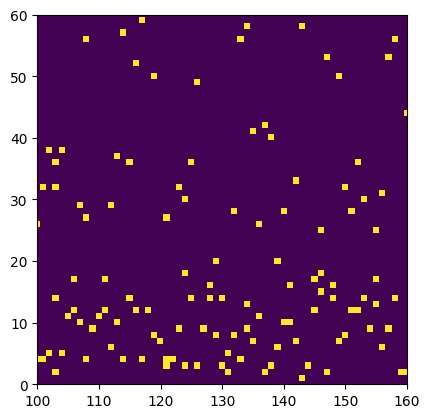

In [4]:
plt.imshow(adj_mat)
plt.xlim(100, 160)
plt.ylim(0, 60)

## Pauli elements per each indexed frame

In [5]:
df_frames 

,index,Z0,X0,Y0,Z1,X1,Y1,Z2,X2,Y2
0,0,"(0, 1)","(1, 0)","(1, 1)","(0, 2)","(2, 2)","(2, 0)","(4, 4)","(4, 0)","(0, 4)"
1,1,"(0, 1)","(1, 0)","(1, 1)","(0, 2)","(2, 4)","(2, 6)","(0, 4)","(4, 2)","(4, 6)"
2,2,"(0, 1)","(1, 0)","(1, 1)","(0, 2)","(6, 0)","(6, 2)","(0, 6)","(4, 0)","(4, 6)"
3,3,"(0, 1)","(1, 0)","(1, 1)","(0, 2)","(6, 4)","(6, 6)","(0, 6)","(4, 2)","(4, 4)"
4,4,"(0, 1)","(1, 0)","(1, 1)","(0, 4)","(4, 4)","(4, 0)","(0, 2)","(2, 0)","(2, 2)"
...,...,...,...,...,...,...,...,...,...,...
3379,3379,"(7, 6)","(2, 0)","(5, 6)","(4, 1)","(4, 4)","(0, 5)","(7, 5)","(5, 4)","(2, 1)"
3380,3380,"(7, 6)","(2, 5)","(5, 3)","(3, 7)","(0, 5)","(3, 2)","(7, 5)","(2, 1)","(5, 4)"
3381,3381,"(7, 6)","(3, 6)","(4, 0)","(4, 1)","(7, 3)","(3, 2)","(0, 3)","(2, 1)","(2, 2)"
3382,3382,"(7, 7)","(0, 4)","(7, 3)","(1, 1)","(3, 6)","(2, 7)","(1, 7)","(2, 2)","(3, 5)"


정수 튜플들은 Pauli element들의 Symplectic 표현.

In [6]:
import pauli_utils as pu #Pauli string <-> integer tuple representation

In [7]:
pu.pstr2sym_code("IZX"), pu.sym_code2pstr((0, 2), 3), pu.sym_code2pstr((0, 2), 4) # (nx, nz), qubit number

((1, 2), 'IZI', 'IIZI')

Qubit 갯수는 3.
예를 들어서, `df_frames`의 3번째 Pauli Frame에 있는 Pauli elements들은.

```
(0,1), (1,0), (1,1), (0,2), (6,0), (6,2), (0,6), (4,0), (4,6)
```

Pauli string으로 표현하면 다음과 같다.

In [8]:
for p in [(0,1), (1,0), (1,1), (0,2), (6,0), (6,2), (0,6), (4,0), (4,6)]:
    print(pu.sym_code2pstr(p, 3), end=", ")

IIZ, IIX, IIY, IZI, XXI, XYI, ZZI, XII, YZI, 

## Hamiltonian

$${}_{64}C_{l}, \, l \in [2, 64] $$

In [14]:
import itertools
from scipy.sparse import coo_matrix
from tqdm import tqdm, tqdm_notebook
from random import shuffle

In [15]:
def generate_combinations(n, length=64):
    # Create a base array of all zeros
    base = [0] * length
    
    # Generate all combinations of indices where 1's will be placed
    combinations = itertools.combinations(range(length), n)
    
    result = []
    for combo in combinations:
        # Create a copy of the base array
        arr = base[:]
        # Set the indices specified by the combination to 1
        for idx in combo:
            arr[idx] = 1
        result.append(arr)
    
    return result

$H$ = $n$ 개 Pauli term,
$n$ 마다 1000개의 랜덤 $H$ 뽑음.

In [20]:
from pauli_utils import h_pstr

In [21]:
N = 1000
for n in tqdm(range(6, 60)):
    #print("N:", n)
    H_database = []
    for i in (range(N)):
        #print(f"{i}/{l}")
        mat_zero = np.zeros((8, 8), dtype=int)
        positions = np.random.choice(np.arange(8*8), size=n, replace=False)
        np.put(mat_zero, positions, 1)

        #arr_c = np.array(c).reshape(8, 8)
        mat = coo_matrix(mat_zero)
        indexes = np.vstack([mat.row, mat.col]).T
        h_list = indexes.tolist()
        h_pst_list = [pu.sym_code2pstr(ns, 3) for ns in h_list]
        cost = h_pstr(h_pst_list)
        H_database.append({"cost":cost, "sym":h_list, "pstr": h_pst_list})
    #print("Save------------")
    with open(f"h_db_{n}.data", "wb") as f:
        pickle.dump(H_database, f)


100%|██████████| 54/54 [00:06<00:00,  8.40it/s]


설명

- $n$ 2-5: 모든 Hamiltonian 조합, 최적화 전 cost는 없음, `h_pstr` 함수로 계산가능.
- $n$ 6-60: 1000개의 Sample, `"cost", "sym", "pstr`,
    - "cost": 표준 Trotter cost, CX gate 갯수
    - "sym": Hamiltonian 에 있는 Pauli elements들의 Symplectic 표현.
    - "pstr": Hamiltonian 에 있는 Pauli elements들의 pauli string 표현.

데이터 불러오기

In [22]:
import pickle

In [23]:
n = 24
with open(f"h_db_{n}.data", "rb") as f:
    h_Data = pickle.load(f)

In [26]:
len(h_Data)

1000

In [29]:
h_Data[0]["sym"]

[[0, 4],
 [0, 5],
 [0, 6],
 [1, 1],
 [1, 4],
 [1, 5],
 [2, 0],
 [2, 4],
 [2, 6],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 4],
 [5, 0],
 [5, 1],
 [5, 5],
 [5, 6],
 [6, 1],
 [7, 0],
 [7, 2],
 [7, 4],
 [7, 5],
 [7, 6],
 [7, 7]]

In [30]:
h_Data[0]["pstr"]

['ZII',
 'ZIZ',
 'ZZI',
 'IIY',
 'ZIX',
 'ZIY',
 'IXI',
 'ZXI',
 'ZYI',
 'ZXX',
 'ZXY',
 'ZYX',
 'YII',
 'XIX',
 'XIY',
 'YIY',
 'YZX',
 'XXZ',
 'XXX',
 'XYX',
 'YXX',
 'YXY',
 'YYX',
 'YYY']

---

## Subgraph

In [32]:
frame_list_sub= [ # Hash values in dataframe (184 terms)
    -9147825531830647206, -9140330310642855493, -9019415041487622429, -8783781968770579980, -8580174993368688504, -8379587089558529159, -8303070153800176754, -8238832206007038996, -8089413237674666555, 
    -7902231954553146319, -7775111273788301486, -7429525653622570208, -7268710889228694341, -7244443797086455671, -7152459125755193947, -7073128541025094940, -6921462394610252398, -6807408325082937873, 
    -6713202336160806857, -6698852427693349147, -6622439446523638033, -6561930375224645266, -6468945784840879636, -6356081052581051077, -6278226331610678245, -6212741164461024810, -6207446689330784529, 
    -6192525148079120466, -6067174478774051678, -6052418907371791645, -6031840277459362610, -5939337037706798729, -5896843581398786669, -5807567824048648464, -5737408437309516786, -5729754490278210556,
    -5605752759300810492, -5569813242417574939, -5538161020468344854, -5435880208070702013, -5229740537173257557, -5189616578940594505, -5066356918329051825, -4981378099270486451, -4959120940487136676, 
    -4918804980268939714, -4847769530006930571, -4792502416136428516, -4764462704735367772, -4731490120140857106, -4595593797760798503, -4433606434145783552, -4275346311008742093, -4211901591588287006, 
    -4203929831953948408, -4164917141580386122, -4148513958500354266, -4119396785096177678, -4111828977165638944, -3984289389029823811, -3776076432910104120, -3734767796971983631, -3730162489504560606, 
    -3646755825685788486, -3583628470634767045, -3487260422633355711, -3401978958326471725, -3389215843680303914, -3162998179534418416, -2899264575106373278, -2744893152073802621, -2574916482630967181, 
    -2116408496812737960, -2106485159988134051, -2051087992334428779, -2035974017117587856, -1917268650127838276, -1745909119525388831, -1623104695231389587, -1562217548531272203, -1205932320098917992, 
    -1155712992601518898, -1110953578677009454, -984767987098892411 ,  -918853325254216049, -878016912946256589 ,  -868645801183936846,  -837965093509740261, -770724089926825713 ,  -760352027974472231, 
    -543343515882926073 , -525001282035342348 , -399478947225948094 ,  -398580321379589235, -246490996884293930 ,  -154963587151316743,  -2712524540143647  , 107724817261890205  ,   445723971203211688, 
    537120546080180639  , 632471354872545656  , 685079426390332837  , 713386505563937946  , 829895167504160468  , 922200565285509412  , 945288627908346621  , 985940190993086055  ,  1049971351816688175, 
    1064696052244413259 , 1270773345852725835 , 1341444201095338050,  1399111686488839358 , 1446935990258710855 , 1502911389636403188 , 1565489067983801883 , 1895826367948997221 ,  1934192701680708938,
    2125828733277955074, 2131682145782776200, 2204895440861938944, 2263328752001708969, 2319808004204654743, 2355180134341896622, 2453504718811140942, 2607613536304264738, 2696915160139647086, 
    3039756917854746900, 3062213312772323554, 3172649792788280858, 3230267735301149069, 3289132066653653447, 3335465719179932917, 3433511530960803163, 3527457833127973255, 3553646297893888656, 
    3715970363378037903, 3727768318484324360, 4045768182173100022, 4155893507743199331, 4172356876691664016, 4280120847849534540, 4376968901353387809, 4408313107229131116, 4430508014030916881, 
    4459668853139892780, 4570604611918700897, 4685508718043864533, 5104884371984352337, 5265039699762061509, 5311000286829684568, 5516473702332288266, 5517548463048760000, 5720525404351334848, 
    5764801374202880553, 5942495380024559205, 6026680755239957828, 6097646519863667605, 6125041515292416264, 6169871593107330525, 6211453484807794326, 6320433706638651289, 6608849667308573427, 
    6708015349890259086, 6796087718381519884, 6981374070992382908, 7736945665936224690, 7770280598866912735, 7893413454099603559, 7934267287378752615, 8013915906475947648, 8015334945162885934, 
    8091955490990029930, 8132326212149563238, 8189756339223258563, 8262704947644493203, 8285522328752359477, 8392789670574913480, 8597639669463545897, 8666518618845729015, 8688274525851463686, 
    8690342011034426457, 8899435117699798956, 8994921704264345141, 9044589281511534233
    ]

sub_nodes = pd.DataFrame({"hash":frame_list_sub})
merged_df = df_frame_index_map.merge(sub_nodes, on="hash", how = "right")
merged_df["index"]

0       885
1      1863
2      1896
3      1387
4       110
       ... 
179    1956
180    2480
181    3057
182     433
183    1050
Name: index, Length: 184, dtype: int64

In [33]:
sub_graph = G.subgraph(merged_df["index"])

In [34]:
import networkx as nx
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Sample subgraph')

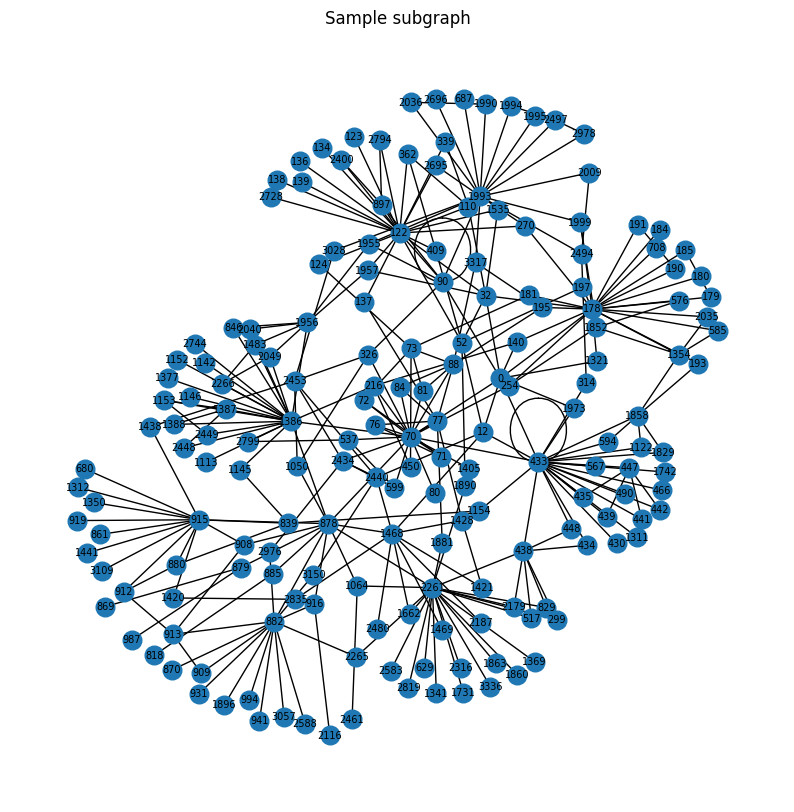

In [36]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
nx.draw_kamada_kawai(sub_graph, ax=ax, node_size =180, with_labels=True, font_size=7)
ax.grid()
ax.set_title("Sample subgraph")